In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data_info = pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [3]:
print(data_info.loc['loan_amnt'].Description)

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [4]:
def description(col_name):
    print(data_info.loc[col_name].Description)

In [5]:
description('installment')

The monthly payment owed by the borrower if the loan originates.


In [6]:
# Data

df = pd.read_csv('lending_club_loan_two.csv')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# EDA

In [8]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<Axes: xlabel='loan_status'>

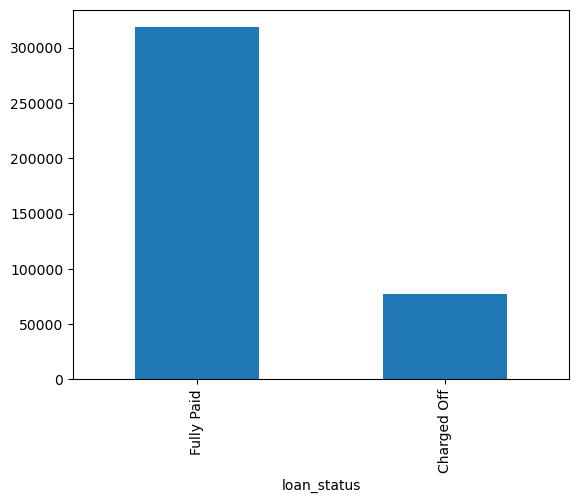

In [9]:
df.loan_status.value_counts().plot.bar()

<Axes: xlabel='loan_status', ylabel='count'>

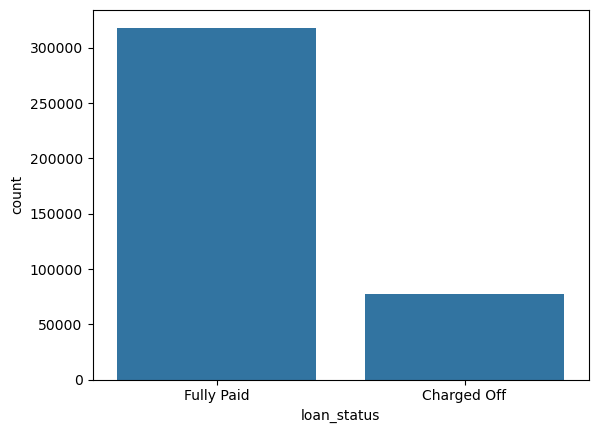

In [10]:
sns.countplot(x= 'loan_status', data= df)

<Axes: xlabel='loan_amnt', ylabel='Count'>

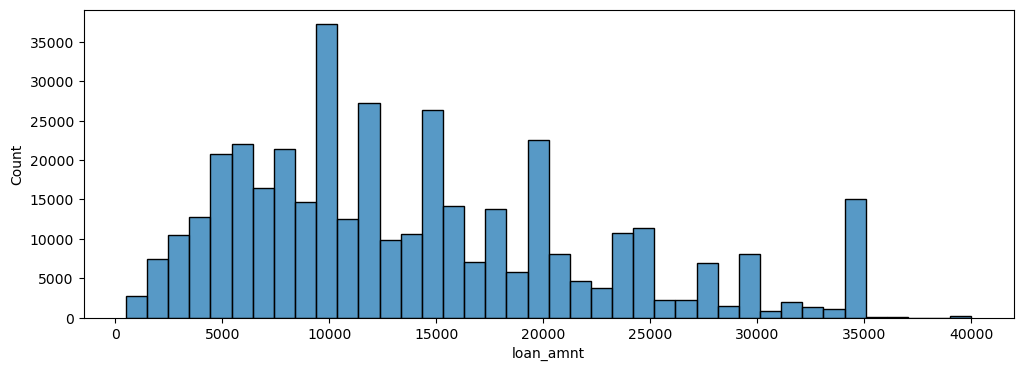

In [11]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'], kde=False, bins =  40)

In [12]:
df.corr(numeric_only=True).T

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

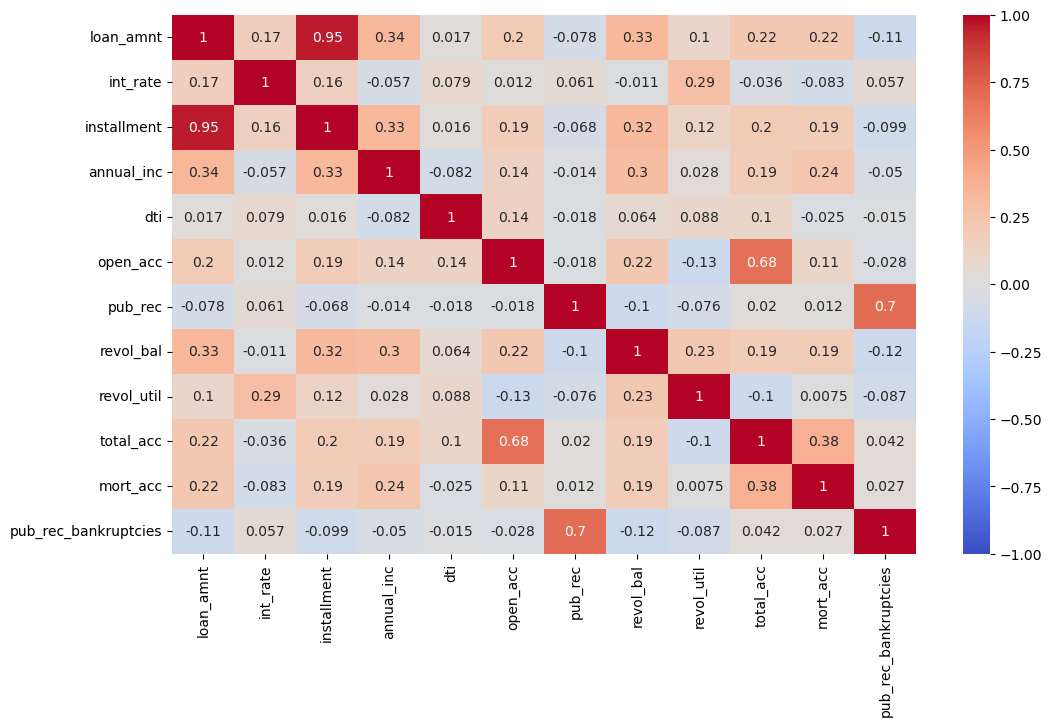

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True), annot= True, cmap='coolwarm', vmin=-1, vmax=1)

In [14]:
description('installment')

The monthly payment owed by the borrower if the loan originates.


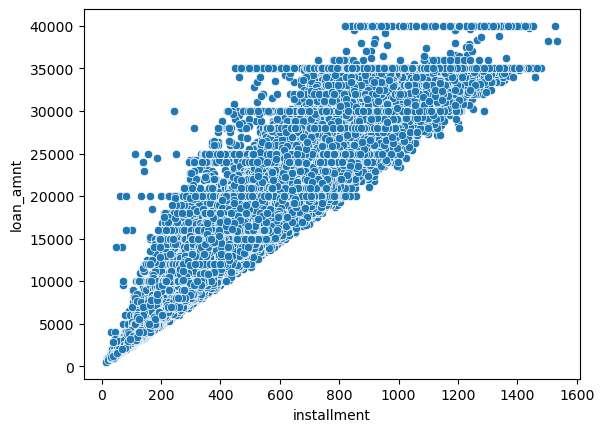

In [15]:
sns.scatterplot(x ='installment' , y = 'loan_amnt', data=df);

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

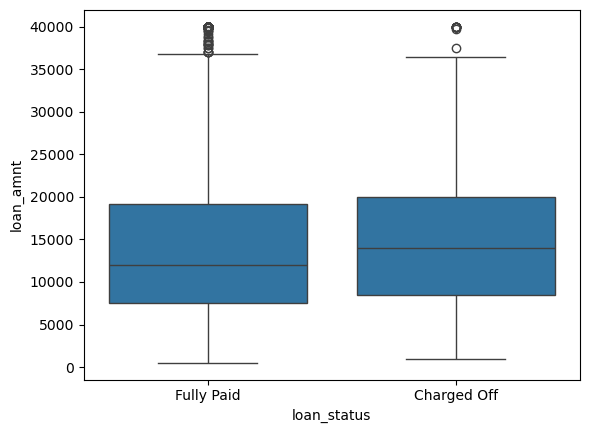

In [16]:
sns.boxplot(x= 'loan_status', y = 'loan_amnt', data=df)

In [17]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
df.grade.value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [19]:
df.sub_grade.value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

In [20]:
df.grade.unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [21]:
df.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

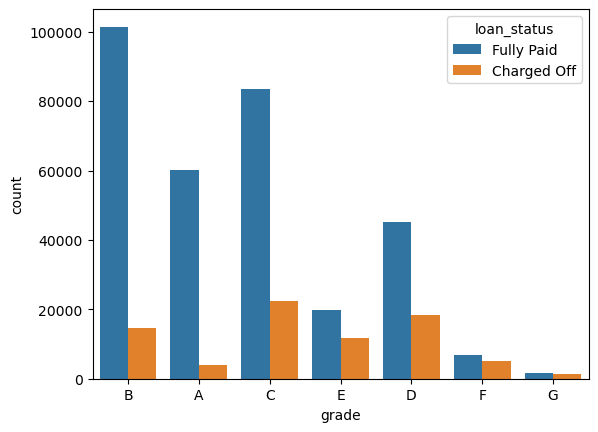

In [22]:
sns.countplot(x='grade', data=df, hue='loan_status')

In [23]:
df.sub_grade.sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<Axes: xlabel='sub_grade', ylabel='count'>

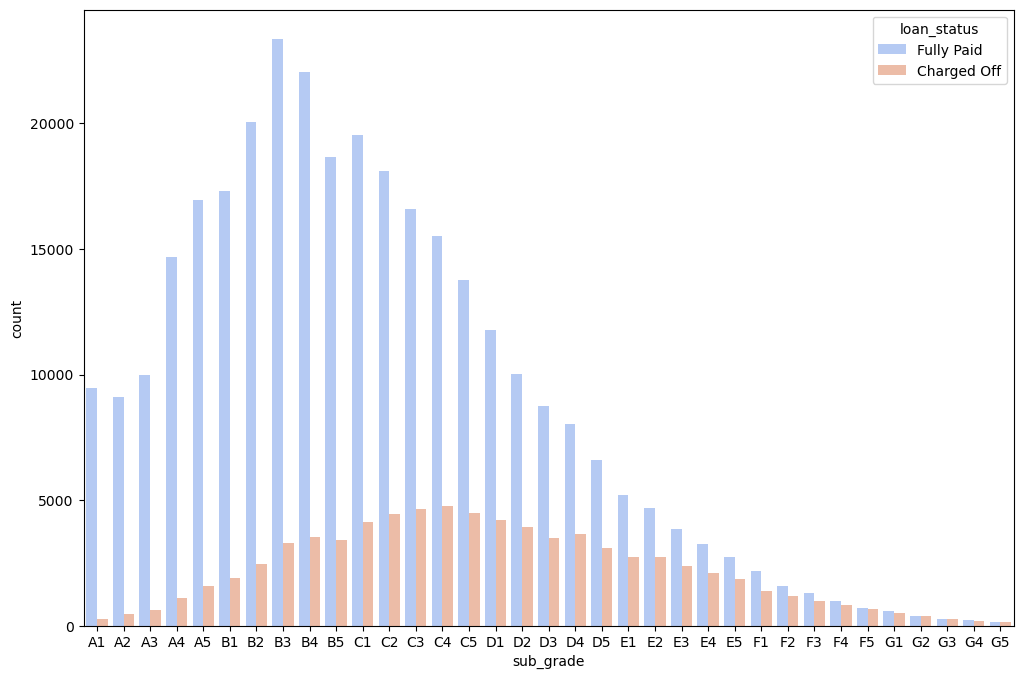

In [24]:
plt.figure(figsize=(12,8))

sub_grade = df.sub_grade.sort_values().unique()
sns.countplot(x='sub_grade',data= df, order=sub_grade, palette='coolwarm',hue= 'loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

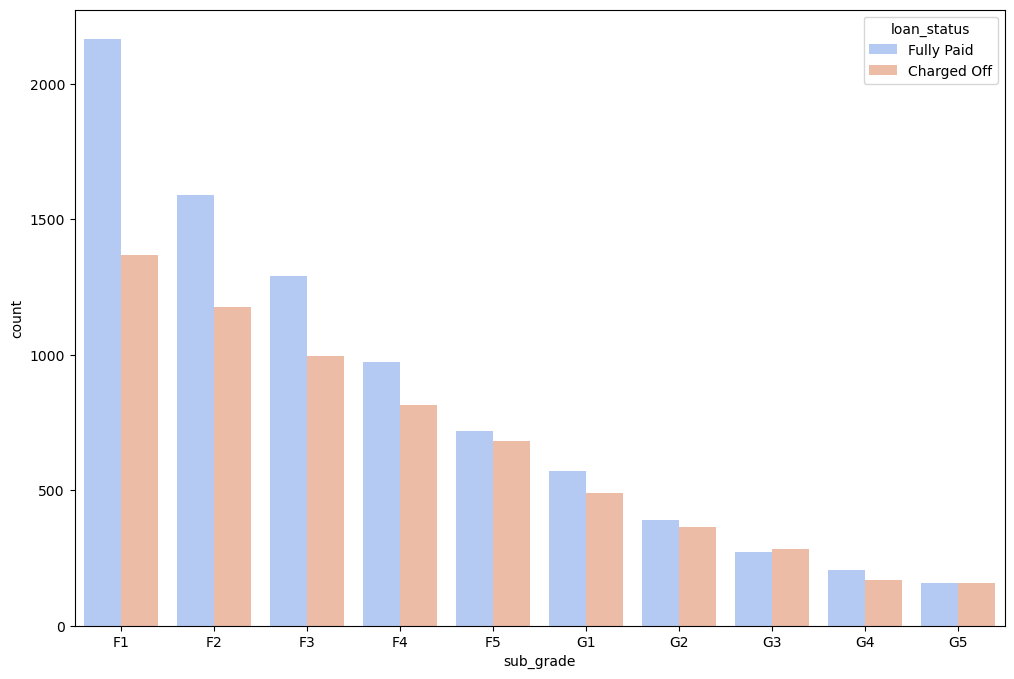

In [25]:
plt.figure(figsize=(12,8))



sub_grade = df.sub_grade.sort_values().unique()[25:]
sub_grade

sns.countplot(x='sub_grade',data= df, order=sub_grade, palette='coolwarm',hue= 'loan_status')

In [26]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## create a new column for loan repaid, 1 for fully paid and 0 for charged off

In [27]:
df['loan_repaid'] = np.where(df.loan_status == 'Fully Paid', 1 ,0)

In [28]:
df['loan_repaid'].value_counts()

loan_repaid
1    318357
0     77673
Name: count, dtype: int64

In [29]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [30]:
df.corr(numeric_only= True)['loan_repaid'].sort_values()[:-1]

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
Name: loan_repaid, dtype: float64

''

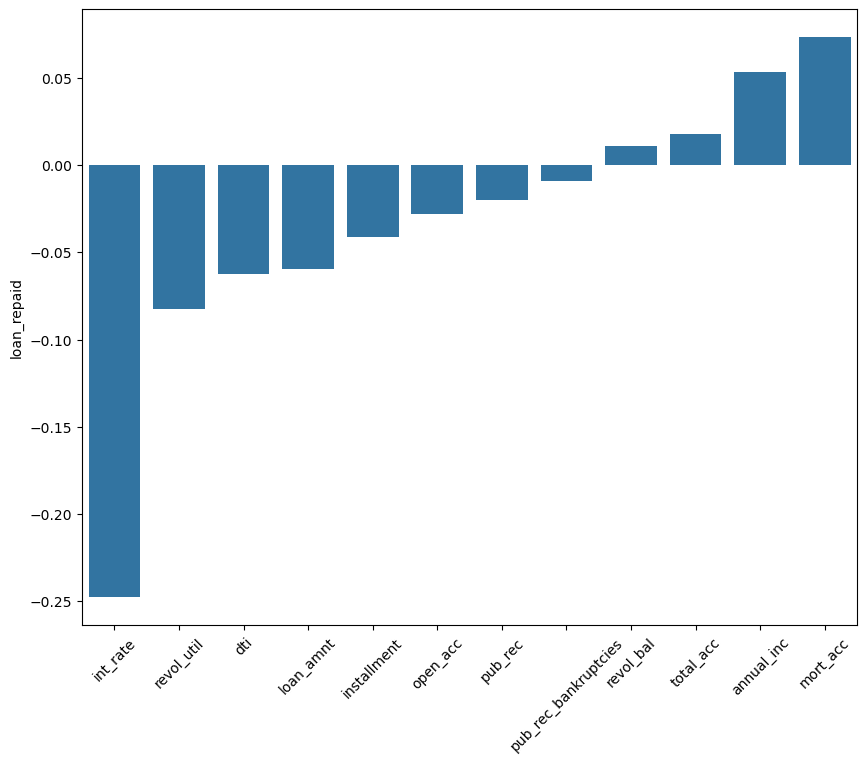

In [31]:

plt.figure(figsize=(10,8))
sns.barplot(data= df.corr(numeric_only= True)['loan_repaid'].sort_values()[:-1])
plt.xticks(rotation = 45)
;

### Dealing with Missing Data 

In [32]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [33]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
df.emp_title.value_counts(dropna=False)

emp_title
NaN                        22927
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
                           ...  
Postman                        1
McCarthy & Holthus, LLC        1
jp flooring                    1
Histology Technologist         1
Gracon Services, Inc           1
Name: count, Length: 173106, dtype: int64

In [35]:
len(df)

396030

In [36]:

# checking percentage of missing values
df.isnull().sum()/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [37]:
df.emp_title.value_counts(dropna= False)

emp_title
NaN                        22927
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
                           ...  
Postman                        1
McCarthy & Holthus, LLC        1
jp flooring                    1
Histology Technologist         1
Gracon Services, Inc           1
Name: count, Length: 173106, dtype: int64

In [38]:
df.emp_title.nunique()

173105

In [39]:
df.emp_length.nunique()

11

In [40]:
# too many employee unique  title 173105 and missing data is 5% so we are going to drop them

df = df.drop('emp_title', axis=1)

In [41]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [42]:
df.emp_length.value_counts().sort_index()

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: count, dtype: int64

In [43]:
sorted(df.emp_length.dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [44]:
order  =[
     '< 1 year',
    '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']


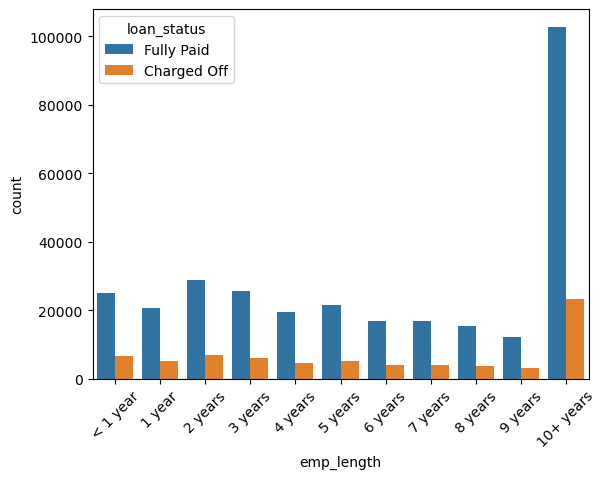

In [45]:
sns.countplot(x = df.emp_length, data = df, order=order, hue='loan_status')
plt.xticks(rotation= 45);

In [46]:
categories = df.emp_length.value_counts()
categories

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [47]:
charged_off = df.loan_status.value_counts().iloc[1]
charged_off

77673

# need to calculate the percentage of charge of per category?


In [51]:
Total_loans = sum( df.emp_length.value_counts()) 
Total_loans


377729

In [65]:
emp_co = df[df['loan_status']== 'Charged Off'].groupby('emp_length').count()['loan_status']

In [66]:
emp_paid = df[df['loan_status']== 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [70]:
emp_len = emp_co / (emp_paid + emp_co)

<Axes: xlabel='emp_length'>

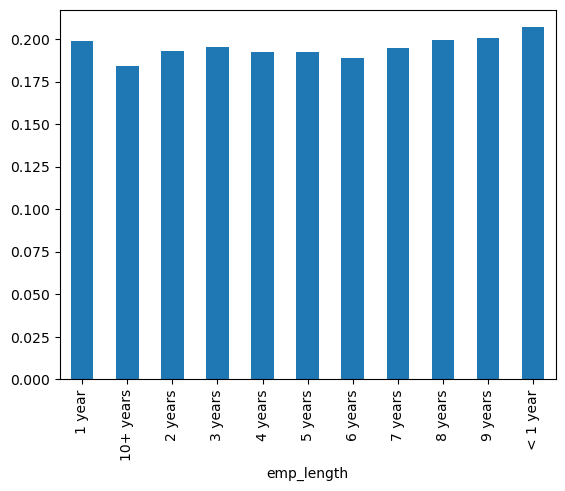

In [71]:
emp_len.plot(kind ='bar')

In [72]:
df = df.drop('emp_length',axis = 1)

In [73]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [75]:
df['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [77]:
df['title'].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [78]:
df = df.drop('title', axis =1)

In [79]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [80]:
description('mort_acc')

Number of mortgage accounts.


In [82]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [85]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [95]:
df['total_acc'].value_counts()

total_acc
21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
110.0        1
129.0        1
135.0        1
104.0        1
103.0        1
Name: count, Length: 118, dtype: int64

In [100]:
df['mort_acc'] = df[['total_acc','mort_acc']].groupby('total_acc').transform(lambda x : x.fillna(x.mean()))

In [101]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [106]:
df  = df.dropna()

In [107]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [110]:
# Dealing with categorical data 

df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [111]:
description('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [112]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [118]:
df['term'] = df['term'].str.replace(' months','').str.strip().astype('int')

C:\Users\theed\AppData\Local\Temp\ipykernel_10424\1001983686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].str.replace(' months','').str.strip().astype('int')


In [119]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int32

In [120]:
df = df.drop('grade', axis =1)

In [121]:
df.select_dtypes('object').columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [125]:
dummies =  pd.get_dummies(df['sub_grade'], drop_first= True, dtype='int')

In [128]:
df =  pd.concat([df.drop('sub_grade', axis =1), dummies], axis =1)

In [130]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [131]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [133]:
df['verification_status'].value_counts()

verification_status
Verified           139451
Source Verified    131301
Not Verified       124467
Name: count, dtype: int64

In [134]:
dummies =  pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']], drop_first= True, dtype='int')
df =  pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'], axis =1), dummies], axis =1)

In [135]:
df.select_dtypes('object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [138]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [156]:
df['home_ownership'] = np.where(df['home_ownership'].isin(['NONE','ANY']),'OTHER', df['home_ownership'])

In [157]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [158]:
dummies =  pd.get_dummies(df['home_ownership'], drop_first= True, dtype='int')
df =  pd.concat([df.drop('home_ownership', axis =1), dummies], axis =1)

In [159]:
df.select_dtypes('object').columns


Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [163]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [166]:
df['zip_code'] = df['address'].str[-5:]

In [168]:
dummies =  pd.get_dummies(df['zip_code'], drop_first= True, dtype='int')
df =  pd.concat([df.drop('zip_code', axis =1), dummies], axis =1)

In [169]:
df = df.drop('address', axis =1)

In [170]:
df.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [172]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [173]:
df = df.drop('issue_d', axis =1)

In [174]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [177]:
df['earliest_cr_line'] = df['earliest_cr_line'].str[-4:].astype('int')

In [178]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

In [180]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',


In [181]:
df[['loan_status', 'loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [182]:
df['loan_status'].value_counts()

loan_status
Fully Paid     317696
Charged Off     77523
Name: count, dtype: int64

In [183]:
df['loan_repaid'].value_counts()

loan_repaid
1    317696
0     77523
Name: count, dtype: int64

In [184]:
df= df.drop('loan_status', axis =1)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int32  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   earliest_cr_line                     395219 non-null  int32  
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc         

In [186]:
X = df.drop('loan_repaid', axis= 1).values
y = df.loan_repaid.values

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
print(len(df))

395219


In [192]:
# sample the data 

df2 = df.sample(frac=0.3, random_state=101)
print(len(df2))

118566


In [193]:
df2

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
204901,14800.0,36,18.49,538.71,104540.0,13.12,1992,10.0,0.0,21241.0,...,1,1,0,0,0,0,0,0,0,0
226870,31000.0,60,17.57,779.97,122000.0,27.46,1996,20.0,0.0,36941.0,...,0,0,0,0,1,0,0,0,0,0
241733,22000.0,60,7.89,444.93,71400.0,21.29,2003,9.0,0.0,5212.0,...,1,0,0,0,0,0,0,0,0,0
225481,20000.0,36,10.78,652.70,100000.0,17.86,1994,14.0,0.0,11139.0,...,0,0,0,1,0,0,0,0,0,0
104657,18625.0,60,17.57,468.61,41500.0,18.80,1993,20.0,0.0,27975.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253590,6000.0,36,19.05,220.09,30000.0,19.91,2005,10.0,0.0,10213.0,...,1,1,0,0,0,0,0,0,0,0
374937,12000.0,36,14.49,413.00,78000.0,19.37,2010,10.0,0.0,9276.0,...,1,0,0,0,0,0,0,0,0,0
385661,28700.0,60,22.15,795.12,62400.0,13.63,1986,20.0,0.0,6736.0,...,1,0,1,0,0,0,0,0,0,0
58483,20000.0,60,23.28,567.04,170000.0,12.81,1979,10.0,0.0,11581.0,...,1,0,0,0,0,0,1,0,0,0


In [194]:
X = df2.drop('loan_repaid', axis= 1).values
y = df2.loan_repaid.values

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [197]:
from sklearn.preprocessing import MinMaxScaler

In [198]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [199]:

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [200]:
X_train.shape

(94852, 78)

In [203]:
model = Sequential()

model.add(Dense(units= 78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units= 39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units= 19, activation='relu'))
model.add(Dropout(0.2))

# Output Layer for binary classification is one layer  activation is sigmoid 0 or 1 class

model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer= 'adam')

In [205]:
from tensorflow.keras.callbacks import EarlyStopping

In [207]:
early_stop = EarlyStopping(monitor='val_loss',mode= 'min', patience=25)

In [208]:
# Fitting the model

model.fit(X_train, y_train, epochs= 25, batch_size=256, validation_data=(X_test, y_test),callbacks= [early_stop])


Epoch 1/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4439 - val_loss: 0.2710
Epoch 2/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2846 - val_loss: 0.2653
Epoch 3/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2747 - val_loss: 0.2642
Epoch 4/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2697 - val_loss: 0.2631
Epoch 5/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2669 - val_loss: 0.2624
Epoch 6/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2658 - val_loss: 0.2622
Epoch 7/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2660 - val_loss: 0.2617
Epoch 8/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2628 - val_loss: 0.2614
Epoch 9/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2649 - val_loss: 0.2635
Epoch 10/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2624 - val_loss: 0.2636
Epoch 11/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2637 - val_loss: 0.2617
Epoch 12/25
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [209]:
losses = pd.DataFrame(model.history.history)


<Axes: >

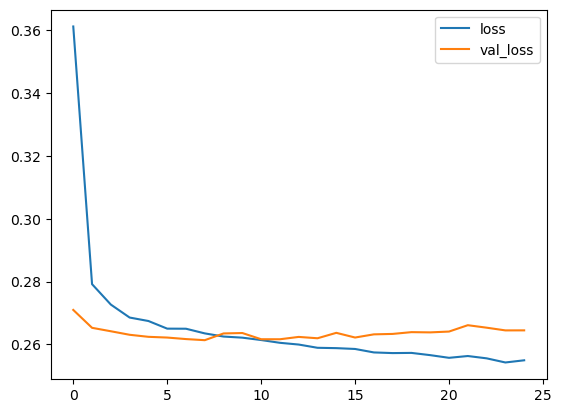

In [211]:
losses.plot()

# Predictions 

In [212]:
from sklearn.metrics import classification_report, confusion_matrix

In [213]:
predictions = model.predict(X_test)

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step


In [216]:
np.where(predictions > 0.5, 1,0)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [218]:
print(classification_report(y_test, np.where(predictions > 0.5, 1,0)))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62      4744
           1       0.88      0.99      0.93     18970

    accuracy                           0.89     23714
   macro avg       0.91      0.73      0.78     23714
weighted avg       0.89      0.89      0.87     23714



In [219]:
confusion_matrix(y_test, np.where(predictions > 0.5, 1,0))

array([[ 2192,  2552],
       [  131, 18839]], dtype=int64)

# predicting on a new value

In [221]:
import random

random.seed(101)

index1 =  random.randint(0, len(df)) # grabbing any random numberr between 0, 321690

In [229]:

# checking th status of the customer 
df.iloc[index1]['loan_repaid']  # the customer paid the loan

1.0

In [233]:
new_customer = df.iloc[index1].drop('loan_repaid').values

In [236]:
one_data = scaler.transform(new_customer.reshape(1,78))

In [237]:
model.predict(one_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[0.5682214]], dtype=float32)

# model predicts right 0.56 means > 0.5 belongs to class 1

# Saving the model 

In [238]:
# save the model

from tensorflow.keras.models import load_model

In [239]:
model.save('King_county_housing_price.keras')

# loading the saved model


In [241]:
load_previous_model = load_model('King_county_housing_price.keras')

# `predicting using saved model

In [242]:
load_previous_model.predict(one_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[0.5682214]], dtype=float32)

# room for improvement by using different batch sizes and different epochas and dropout pct changing